In [1]:
import pandas as pd
import random
import numpy
import math
import seaborn as sns
from sklearn.utils import shuffle
from matplotlib import pyplot

### Load GAN generated data

In [2]:
GAN_Bot = pd.read_csv('GAN_generation/GAN_Generated_Data/Standard_GAN_generated_Bot.csv', sep=',')
print(GAN_Bot.shape)

WGAN_GP_Bot = pd.read_csv('GAN_generation/GAN_Generated_Data/WGAN_GP_generated_Bot.csv', sep=',')
print(WGAN_GP_Bot.shape)

(4999, 24)
(4999, 24)


### Load original data

In [3]:
Bot = pd.read_csv('GAN_generation/Bot_Attack_Data_for_GAN.csv', sep=',')



BF_SSH_Patator = pd.read_csv('GAN_generation/Brute_Force_SSH_Patator_Data.csv', sep=',')

BF_FTP_Patator = pd.read_csv('GAN_generation/Brute_Force_FTP_Patator_Data.csv', sep=',')



WA_Brute_Force = pd.read_csv('GAN_generation/Web_Attack_Brute_Force_Data.csv', sep=',')

WA_XSS = pd.read_csv('GAN_generation/Web_Attack_XSS_Data.csv', sep=',')



DoS_GoldenEye = pd.read_csv('GAN_generation/Dos_GoldenEye_Data.csv', sep=',')

DoS_Hulk = pd.read_csv('GAN_generation/DoS_Hulk_Data.csv', sep=',')

DoS_Slowhttptest = pd.read_csv('GAN_generation/DoS_Slowhttptest_Data.csv', sep=',')

DoS_Slowlori = pd.read_csv('GAN_generation/DoS_Slowlori_Data.csv', sep=',')

### Load the pre-processed training set 

In [4]:
Bot_train = pd.read_csv('Train_test_data/Bot_train.csv', sep=',')

WebAttack_train = pd.read_csv('Train_test_data/WebAttack_train.csv', sep=',') 

Brute_Force_train = pd.read_csv('Train_test_data/Brute_Force_train.csv', sep=',') 

Dos_train = pd.read_csv('Train_test_data/Dos_train.csv', sep=',')

### GAN generated data pre-processing

In [9]:
# change the generated column names to the original ones
GAN_Bot.columns = Bot_train.columns
WGAN_GP_Bot.columns = Bot_train.columns



In [10]:
# Change the label values to the original ones 
GAN_Bot[' Label']=1
WGAN_GP_Bot[' Label']=1




In [13]:
# Binary atributes transformation
#BOTNET
for i in [GAN_Bot['Active Mean'], GAN_Bot[' Active Std'], GAN_Bot[' Idle Std'], GAN_Bot['Fwd PSH Flags'], GAN_Bot['FIN Flag Count'],GAN_Bot[' RST Flag Count'], GAN_Bot[' ACK Flag Count'], GAN_Bot[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1
    
for i in [WGAN_GP_Bot['Active Mean'], WGAN_GP_Bot[' Active Std'], WGAN_GP_Bot[' Idle Std'], WGAN_GP_Bot['Fwd PSH Flags'], WGAN_GP_Bot['FIN Flag Count'],WGAN_GP_Bot[' RST Flag Count'], WGAN_GP_Bot[' ACK Flag Count'], WGAN_GP_Bot[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1
    
    
#BRUTEFORCE   
for i in [brute_force_generated_FTP_Patator['Active Mean'], brute_force_generated_FTP_Patator[' Active Std'], brute_force_generated_FTP_Patator[' Idle Std'], brute_force_generated_FTP_Patator['Fwd PSH Flags'], brute_force_generated_FTP_Patator['FIN Flag Count'],brute_force_generated_FTP_Patator[' RST Flag Count'], brute_force_generated_FTP_Patator[' ACK Flag Count'], brute_force_generated_FTP_Patator[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1

for i in [brute_force_generated_SSH_Patator['Active Mean'], brute_force_generated_SSH_Patator[' Active Std'], brute_force_generated_SSH_Patator[' Idle Std'], brute_force_generated_SSH_Patator['Fwd PSH Flags'], brute_force_generated_SSH_Patator['FIN Flag Count'],brute_force_generated_SSH_Patator[' RST Flag Count'], brute_force_generated_SSH_Patator[' ACK Flag Count'], brute_force_generated_SSH_Patator[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1
    
    
#WEBATTACK   
for i in [Web_Attack_generated_Brute_Force['Active Mean'], Web_Attack_generated_Brute_Force[' Active Std'], Web_Attack_generated_Brute_Force[' Idle Std'], Web_Attack_generated_Brute_Force['Fwd PSH Flags'], Web_Attack_generated_Brute_Force['FIN Flag Count'],Web_Attack_generated_Brute_Force[' RST Flag Count'], Web_Attack_generated_Brute_Force[' ACK Flag Count'], Web_Attack_generated_Brute_Force[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1

for i in [Web_Attack_generated_XSS['Active Mean'], Web_Attack_generated_XSS[' Active Std'], Web_Attack_generated_XSS[' Idle Std'], Web_Attack_generated_XSS['Fwd PSH Flags'], Web_Attack_generated_XSS['FIN Flag Count'],Web_Attack_generated_XSS[' RST Flag Count'], Web_Attack_generated_XSS[' ACK Flag Count'], Web_Attack_generated_XSS[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1
    
    
#DOS    
for i in [DoS_generated_Slowhttptest['Active Mean'], DoS_generated_Slowhttptest[' Active Std'], DoS_generated_Slowhttptest[' Idle Std'], DoS_generated_Slowhttptest['Fwd PSH Flags'], DoS_generated_Slowhttptest['FIN Flag Count'],DoS_generated_Slowhttptest[' RST Flag Count'], DoS_generated_Slowhttptest[' ACK Flag Count'], DoS_generated_Slowhttptest[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1

for i in [DoS_generated_Slowlori['Active Mean'], DoS_generated_Slowlori[' Active Std'], DoS_generated_Slowlori[' Idle Std'], DoS_generated_Slowlori['Fwd PSH Flags'], DoS_generated_Slowlori['FIN Flag Count'],DoS_generated_Slowlori[' RST Flag Count'], DoS_generated_Slowlori[' ACK Flag Count'], DoS_generated_Slowlori[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1

for i in [DoS_generated_Heartbleed['Active Mean'], DoS_generated_Heartbleed[' Active Std'], DoS_generated_Heartbleed[' Idle Std'], DoS_generated_Heartbleed['Fwd PSH Flags'], DoS_generated_Heartbleed['FIN Flag Count'],DoS_generated_Heartbleed[' RST Flag Count'], DoS_generated_Heartbleed[' ACK Flag Count'], DoS_generated_Heartbleed[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1

for i in [DoS_generated_Heartbleed['Active Mean'], DoS_generated_Heartbleed[' Active Std'], DoS_generated_Heartbleed[' Idle Std'], DoS_generated_Heartbleed['Fwd PSH Flags'], DoS_generated_Heartbleed['FIN Flag Count'],DoS_generated_Heartbleed[' RST Flag Count'], DoS_generated_Heartbleed[' ACK Flag Count'], DoS_generated_Heartbleed[' URG Flag Count']]:
    i[i<0.5]=0
    i[i>=0.5]=1

C:\Users\Elisa Valente\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Elisa Valente\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### GAN generated data Shuffle

In [30]:
GAN_Bot = shuffle(GAN_Bot)
WGAN_GP_Bot = shuffle(WGAN_GP_Bot)



### Euclidean Distance & Histograms

Euclidean Distance of  Source Port: 0.0019764882319355543


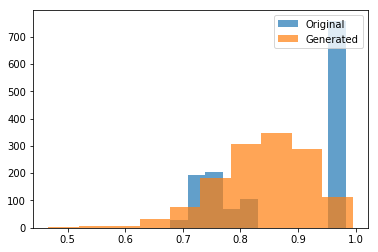

Euclidean Distance of  Protocol: 0.0026867514952977224


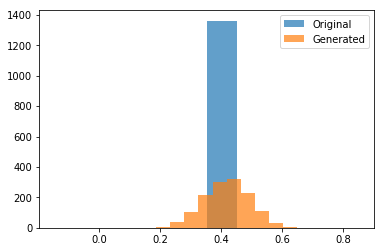

Euclidean Distance of Total Length of Fwd Packets: 0.005453088147650416


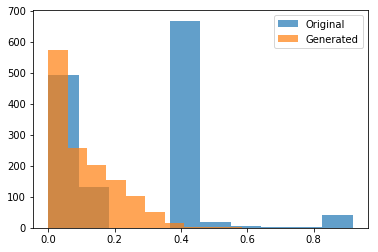

Euclidean Distance of  Fwd Packet Length Min: 1.6859261772845454e-05


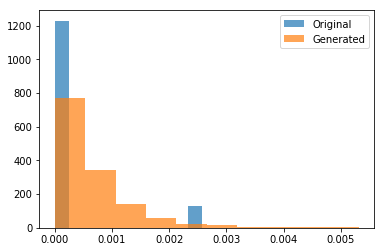

Euclidean Distance of Flow Bytes/s: 0.002382309963569692


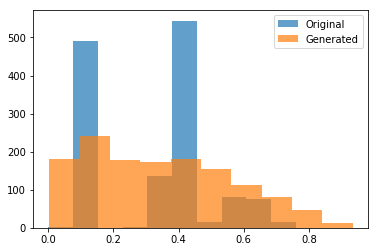

Euclidean Distance of  Flow Packets/s: 0.0027695566533012445


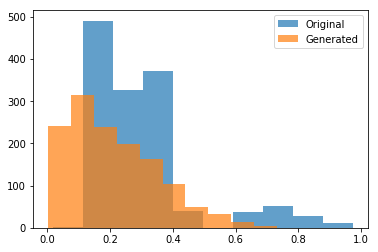

Euclidean Distance of  Fwd IAT Max: 0.003979278571940213


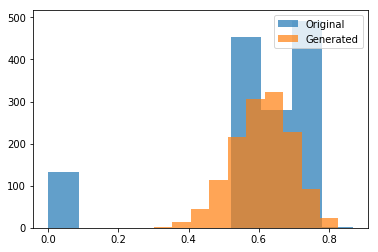

Euclidean Distance of  Fwd IAT Min: 0.0033442144598879726


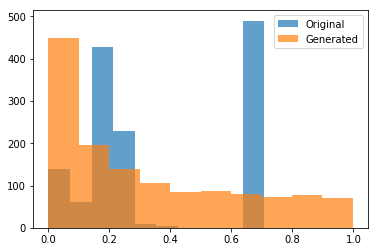

Euclidean Distance of Bwd IAT Total: 0.0032924623479328547


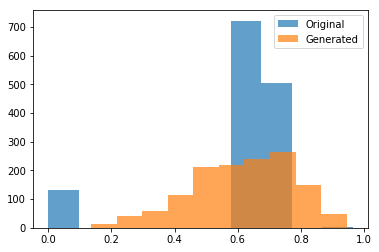

Euclidean Distance of Fwd PSH Flags: 0.0


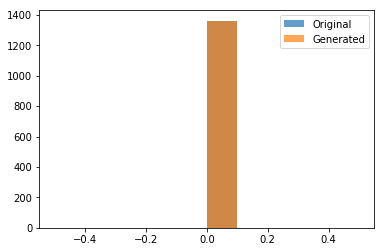

Euclidean Distance of  Fwd Header Length: 0.002299150163974385


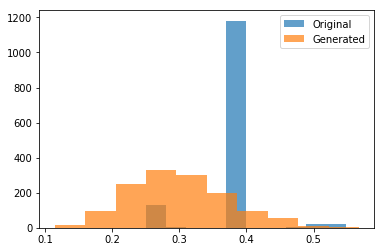

Euclidean Distance of  Bwd Packets/s: 0.005870734643342655


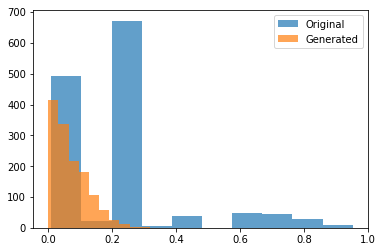

Euclidean Distance of FIN Flag Count: 0.0


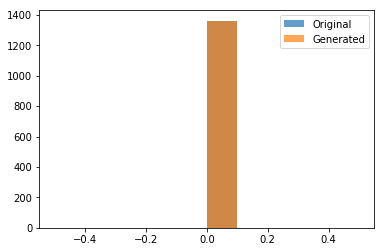

Euclidean Distance of  RST Flag Count: 0.0


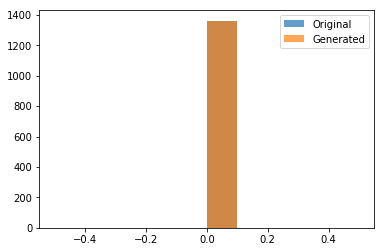

Euclidean Distance of  ACK Flag Count: 0.008473594852807345


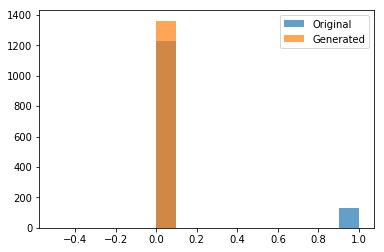

Euclidean Distance of  URG Flag Count: 0.007635786073044279


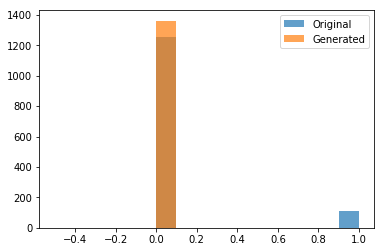

Euclidean Distance of  Down/Up Ratio: 0.001903403849389553


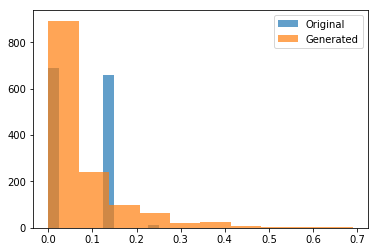

Euclidean Distance of  Avg Bwd Segment Size: 0.00011621761436320097


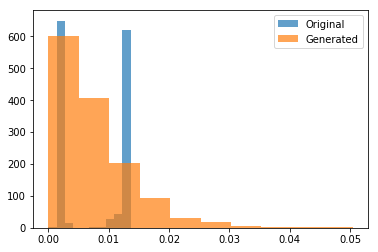

Euclidean Distance of  act_data_pkt_fwd: 1.8740253562890858e-05


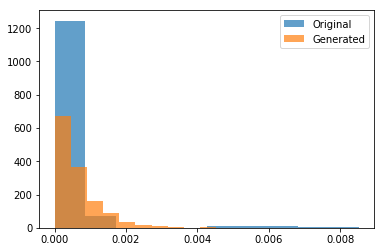

Euclidean Distance of  min_seg_size_forward: 0.002297346731053614


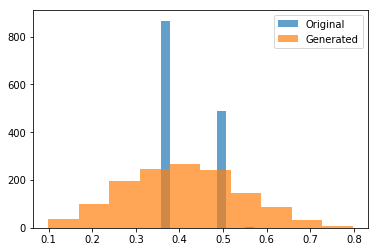

Euclidean Distance of Active Mean: 0.0006202513715416111


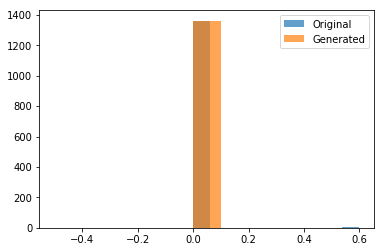

Euclidean Distance of  Active Std: 0.0005854684152897653


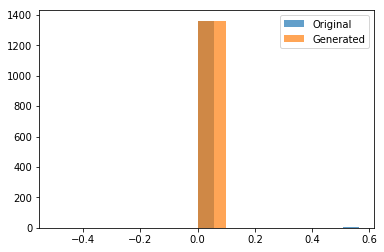

Euclidean Distance of  Idle Std: 0.0005703664929815457


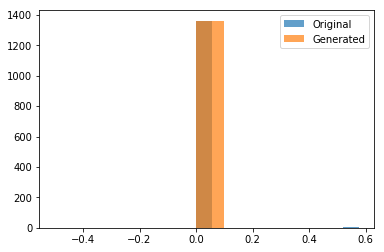

Euclidean Distance of  Label: 0.0


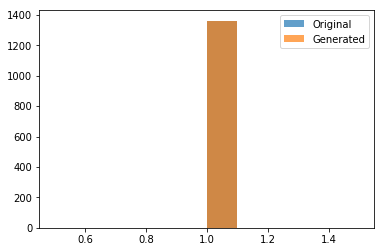

In [31]:
#Choose the data to measure
ORIGINAL_DATA = Bot
GENERATED_DATA = GAN_Bot


NUMBER_ROWS = len(ORIGINAL_DATA)
GENERATED_DATA = GENERATED_DATA[:NUMBER_ROWS]

for feature in ORIGINAL_DATA.columns:
    array = [value for value in ORIGINAL_DATA[feature]]
    temp =  [value for value in GENERATED_DATA[feature]]
    
    array.sort()
    temp.sort()
   
    x=tuple(array)
    y= tuple(temp)

    distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(x, y)]))
    euclidean_distance = distance/NUMBER_ROWS

    print('Euclidean Distance of ' + feature + ': ' + str(euclidean_distance))
    pyplot.figure()
    pyplot.hist(array, alpha=0.7, label='Original')
    pyplot.hist(temp, alpha=0.7, label='Generated')
    pyplot.legend(loc='upper right')
    pyplot.show()

### Join the generated data to the train set

In [28]:
GAN_Bot_train = pd.concat([GAN_Bot, Bot_train])
GAN_Bot_train = shuffle(GAN_Bot_train)

WGAN_GP_Bot_train = pd.concat([WGAN_GP_Bot, Bot_train])
WGAN_GP_Bot_train = shuffle(WGAN_GP_Bot_train)

### Save the GAN balanced training set

In [29]:
GAN_Bot_train.to_csv(r'GAN_generation\GAN_Balanced_Data/GAN_Bot_train.csv', index = False)
WGAN_GP_Bot_train.to_csv(r'GAN_generation\WGAN_GP_Balanced_Data/WGAN_GP_Bot_train.csv', index = False)